<a href="https://colab.research.google.com/github/MarcoIntor/Repositorio-Marco/blob/main/XGBOOST_Clasificaci%C3%B3n_utilizando_XGBoost_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación utilizando XGBoost (Core)


**Objetivo**: Implementar XGBoost para el dataset Heart Disease Dataset. Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

Enlace de Dataset "preparado": https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## **Parte 1: Carga y Exploración Inicial de Datos**

### 1. a) Carga del Dataset:

In [ ]:
# Instalar la versión 1.5.2 de la librería scikit-learn
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 59.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
# Importar la librería pandas para manipulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV 'heart.csv' y cargarlo en un DataFrame llamado df
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 1. b) Exploración Inicial:

In [ ]:
# Revisamos el número de filas y columnas del dataframe
print(df.shape)

# Revisamos información general del dataframe, incluyendo vista de valaores nulos, tipos de datos,  etc
print(df.info())

# No hay valores nulos en este dataframe
# El tipo de dato de todas las columnas es numérico

(1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


### 1. c) Descripción de los Datos

In [ ]:
# Obtener estadísticas descriptivas del DataFrame df, como el conteo, media, desviación estándar, valores mínimo y máximo, y percentiles
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1. d) Datos faltantes

In [ ]:
# Identificar valores faltantes
valores_faltantes = df.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes[valores_faltantes > 0])

# No hay valores faltantes
# Verificar y contar los valores nulos (faltantes) en cada columna del DataFrame df
print(df.isnull().sum())

Valores faltantes por columna:
Series([], dtype: int64)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 1. e) Datos Outliers

El z-score mide cuántas desviaciones estándar se encuentra un valor de la media de una distribución. Un z-score mayor que 3 significa que el valor está a más de 3 desviaciones estándar de la media, lo cual indica que es un valor muy alejado de los demás y probablemente es un outlier (valor atípico).

En resumen, el código detecta valores atípicos en las columnas numéricas del DataFrame, considerando que son outliers aquellos valores cuyo z-score es mayor a 3 (lo que indica que están demasiado alejados de la media en comparación con el resto de los datos).

In [ ]:
# Importa la función zscore de scipy.stats para calcular el puntaje z (z-score) de cada valor
from scipy.stats import zscore

# Selecciona las columnas numéricas del DataFrame (tipos float64 e int64)
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Inicializa un diccionario para almacenar la cantidad de outliers por columna
outliers = {}

# Itera sobre cada columna numérica
for col in num_columns:
    # Calcula el z-score para cada valor en la columna
    z_scores = zscore(df[col])
    # Cuenta cuántos valores tienen un z-score absoluto mayor que 3 (considerados outliers)
    outliers[col] = (abs(z_scores) > 3).sum()

# Imprime el número de outliers encontrados por cada columna
print("Número de outliers por columna:\n", outliers)

Número de outliers por columna:
 {'age': np.int64(0), 'sex': np.int64(0), 'cp': np.int64(0), 'trestbps': np.int64(7), 'chol': np.int64(13), 'fbs': np.int64(0), 'restecg': np.int64(0), 'thalach': np.int64(4), 'exang': np.int64(0), 'oldpeak': np.int64(7), 'slope': np.int64(0), 'ca': np.int64(18), 'thal': np.int64(7), 'target': np.int64(0)}


In [ ]:
# Calcular el z-score para todas las columnas numéricas (de tipo float e int) del DataFrame df
z_scores = zscore(df.select_dtypes(include=[float, int]))

# Obtener los valores absolutos de los z-scores
abs_z_scores = abs(z_scores)

# Detectar outliers, considerando aquellos con un z-score absoluto mayor a 3
outliers = (abs_z_scores > 3).any(axis=1)

# Imprimir el número total de outliers detectados
print(f"Número de outliers detectados: {outliers.sum()}")

Número de outliers detectados: 56


Vemos presencia de pocas cantidad de outliers. Lo cual no es muy significativo para el modelo de XGBoost, el cual es robusto para outliers.

Por lo tanto, no eliminaremos los outliers, ya que XGBoost es rebusto para estos valores.

## Parte 2: Análisis Exploratorio de Datos (EDA)




### 2. a) Análisis Estadístico Descriptivo:

#### 2.a.1) Mediana de los Datos

In [ ]:
# Calcular y mostrar la mediana de las columnas numéricas del DataFrame df
print("\nMediana de las columnas numéricas:")
print(df.median())


Mediana de las columnas numéricas:
age          56.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     152.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64


#### 2.a.2) Desviación Estándar

In [ ]:
# Calcular y mostrar la desviación estándar de las columnas numéricas del DataFrame df
print("\nDesviación estándar de las columnas numéricas:")
print(df.std())


Desviación estándar de las columnas numéricas:
age          9.072290
sex          0.460373
cp           1.029641
trestbps    17.516718
chol        51.592510
fbs          0.356527
restecg      0.527878
thalach     23.005724
exang        0.472772
oldpeak      1.175053
slope        0.617755
ca           1.030798
thal         0.620660
target       0.500070
dtype: float64


#### 2.a.3) Distribución variables categóricas

In [ ]:
# Definir las columnas categóricas a analizar
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Iterar sobre cada columna categórica y mostrar su distribución
for column in categorical_columns:
    print(f"Distribución de la variable categórica: {column}")
    # Mostrar el conteo de valores únicos para cada variable categórica
    print(df[column].value_counts())
    print()

Distribución de la variable categórica: sex
sex
1    713
0    312
Name: count, dtype: int64

Distribución de la variable categórica: cp
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

Distribución de la variable categórica: fbs
fbs
0    872
1    153
Name: count, dtype: int64

Distribución de la variable categórica: restecg
restecg
1    513
0    497
2     15
Name: count, dtype: int64

Distribución de la variable categórica: exang
exang
0    680
1    345
Name: count, dtype: int64

Distribución de la variable categórica: slope
slope
1    482
2    469
0     74
Name: count, dtype: int64

Distribución de la variable categórica: ca
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

Distribución de la variable categórica: thal
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

Distribución de la variable categórica: target
target
1    526
0    499
Name: count, dtype: int64



### 2. b) Visualizaciones


#### 2.b.1) Histogramas variables numéricas

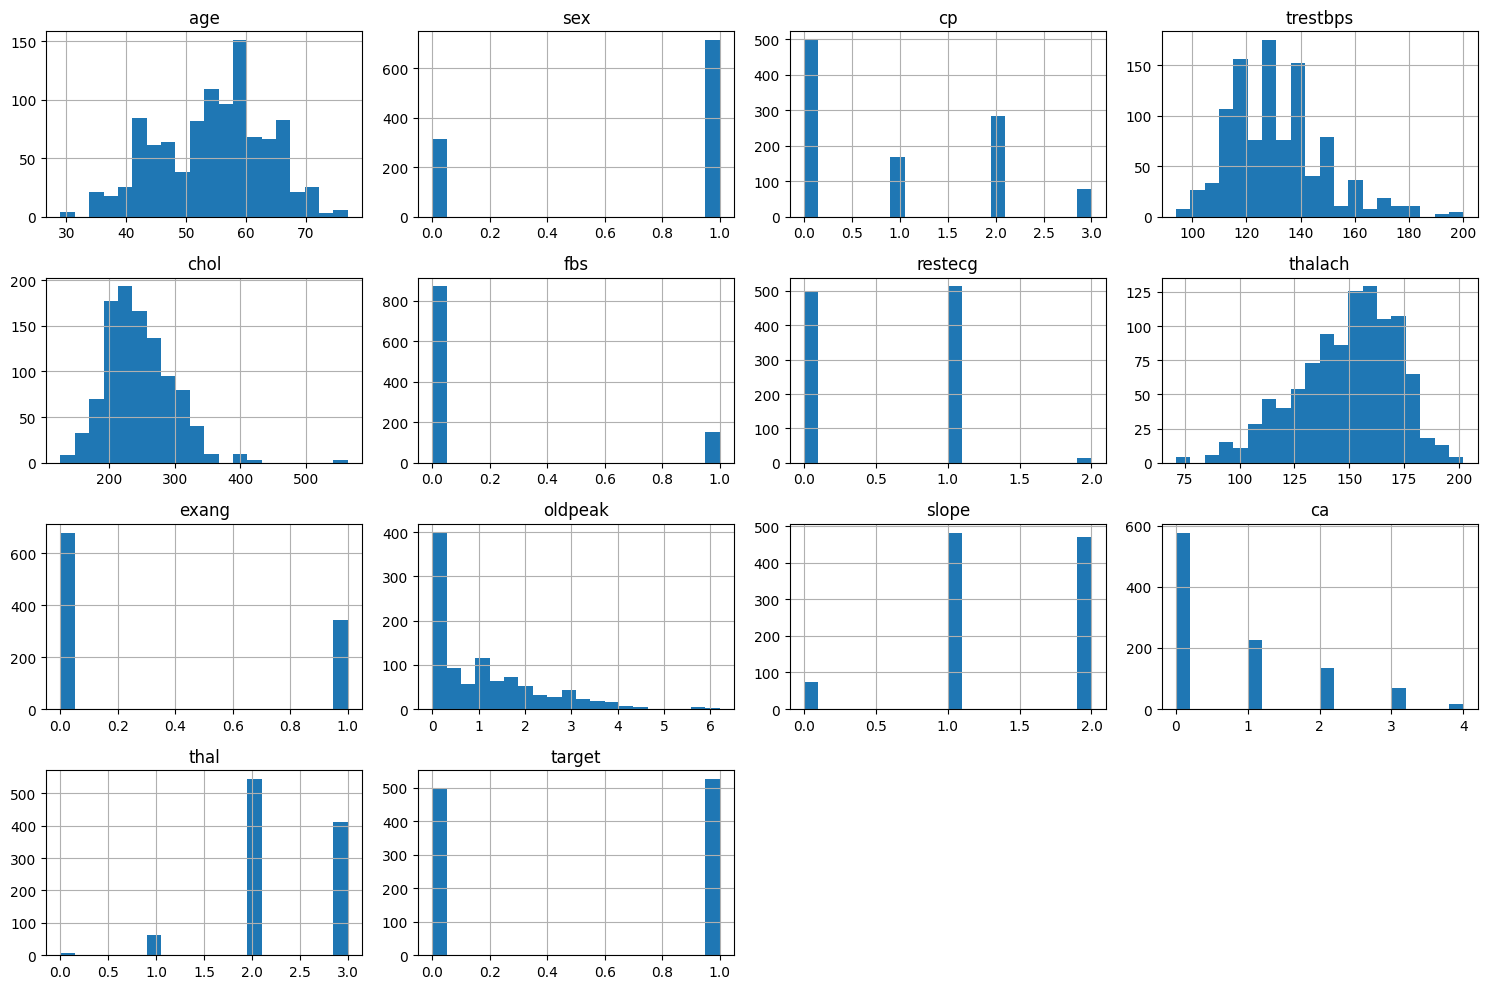

In [ ]:
# Crear histogramas para todas las variables numéricas del DataFrame df
df.hist(bins=20, figsize=(15, 10))

# Ajustar el diseño para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar los histogramas generados
plt.show()

# Vemos una distribución en años, donde la mayor repetición es cerca a 60 años
# Encontramos el doble de registros de sexo masculo en comparación con el sexo femenino
# En la columna objetivo, o target, encontramos que hay una mayor presencia de datos en "1", que indica problemas cardiacos

#### 2.b.2) Gráficos de barras

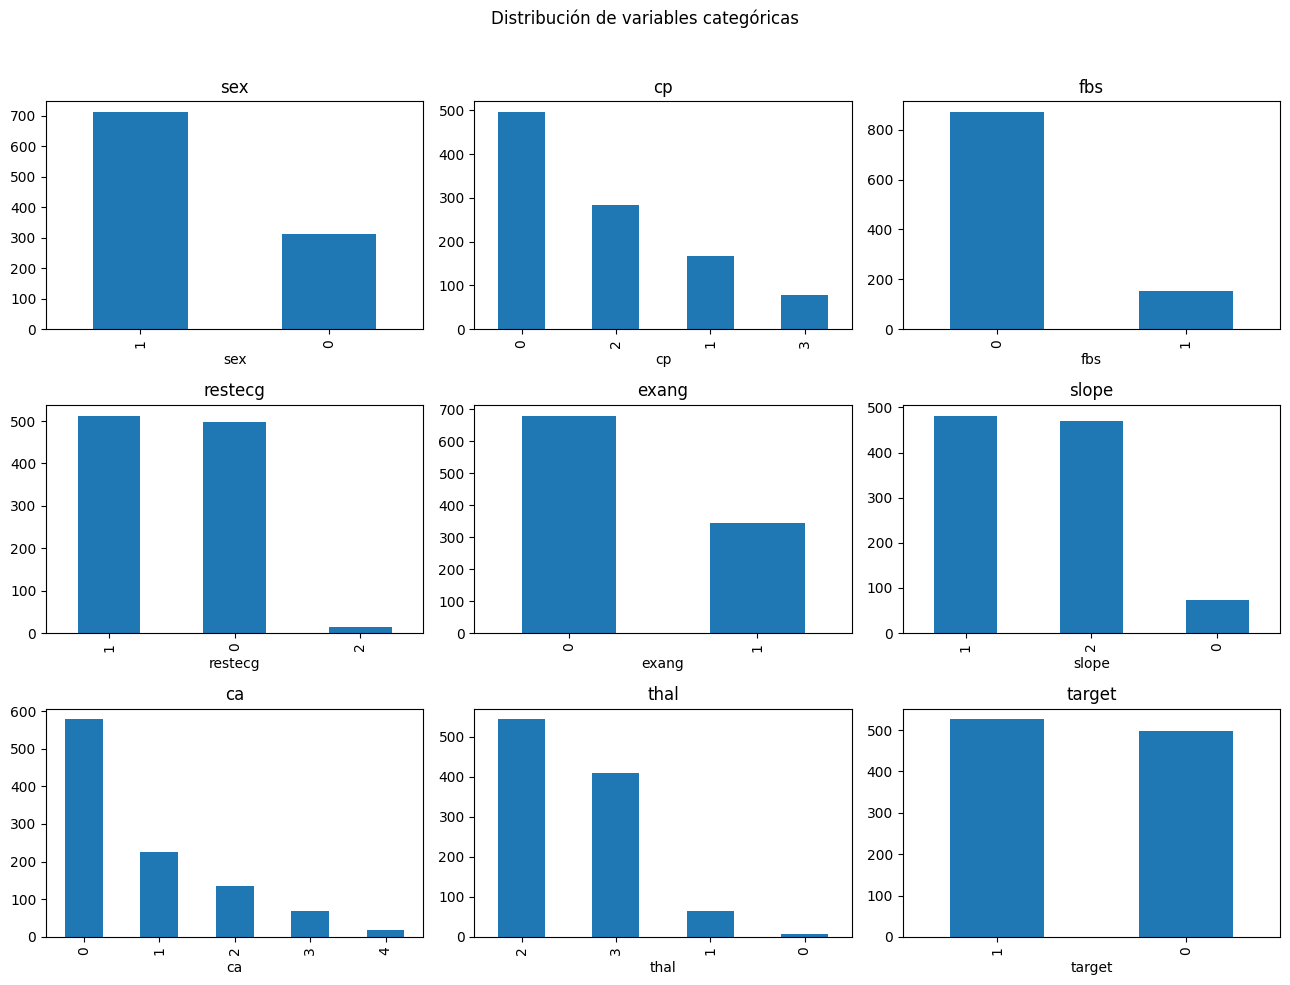

In [ ]:
# Crear una figura con subgráficos (subplots) para representar gráficos de barras
fig, axes = plt.subplots(3, 3, figsize=(13, 10))

# Establecer un título general para la figura
fig.suptitle('Distribución de variables categóricas')

# Definir las columnas categóricas a analizar
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Iterar sobre las columnas categóricas y crear un gráfico de barras para cada una
for i, column in enumerate(categorical_columns):
    ax = axes[i // 3, i % 3]  # Seleccionar el subgráfico correspondiente
    df[column].value_counts().plot(kind='bar', ax=ax)  # Crear gráfico de barras
    ax.set_title(column)  # Asignar el título del gráfico

# Ajustar el diseño para evitar que los gráficos se solapen
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar la figura con los subgráficos
plt.show()

#### 2.b.3) Mapa de correlación

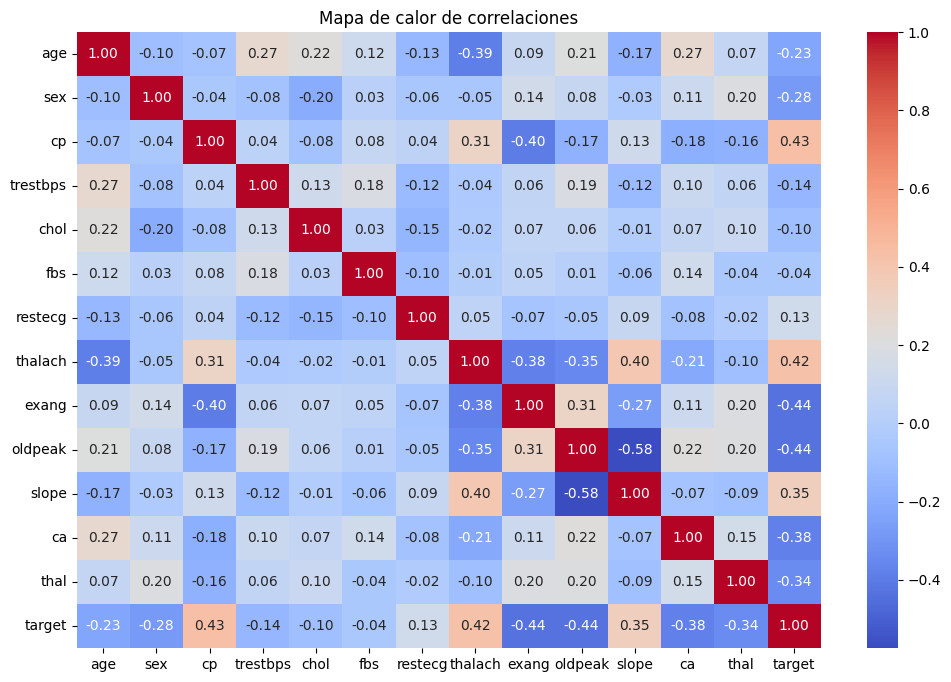

In [ ]:
# Importar la librería seaborn para la visualización avanzada de datos
import seaborn as sns

# Crear una figura de tamaño 12x8 para el mapa de calor
plt.figure(figsize=(12, 8))

# Calcular la matriz de correlación de las variables numéricas en el DataFrame df
correlation_matrix = df.corr()

# Crear el mapa de calor con la matriz de correlación, con anotaciones en cada celda
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Establecer el título del gráfico
plt.title('Mapa de calor de correlaciones')

# Mostrar el mapa de calor
plt.show()

# No encontramos correlaciones lineales muy marcadas

#### 2.b.4) Graficos de Dispersión

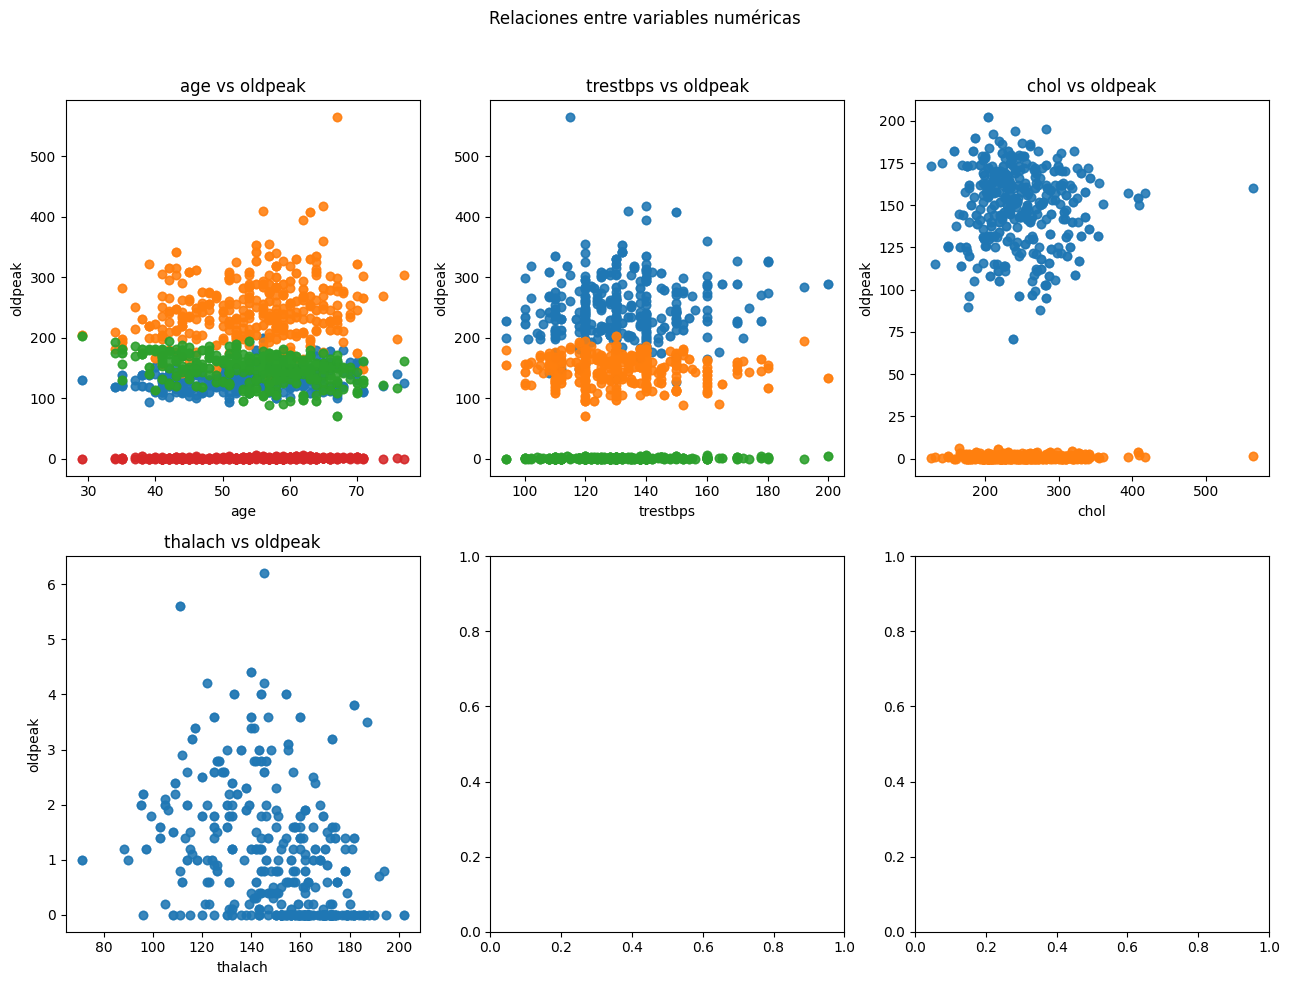

In [ ]:
# Crear una figura con subgráficos (subplots) para gráficos de dispersión
fig, axes = plt.subplots(2, 3, figsize=(13, 10))

# Establecer un título general para la figura
fig.suptitle('Relaciones entre variables numéricas')

# Definir las columnas numéricas a analizar
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Iterar sobre todos los pares de variables numéricas y crear un gráfico de dispersión para cada par
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        ax = axes[i // 3, i % 3]  # Seleccionar el subgráfico correspondiente
        ax.scatter(df[numerical_columns[i]], df[numerical_columns[j]], alpha=0.5)  # Crear gráfico de dispersión
        ax.set_xlabel(numerical_columns[i])  # Etiqueta del eje X
        ax.set_ylabel(numerical_columns[j])  # Etiqueta del eje Y
        ax.set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')  # Título del gráfico

# Ajustar el diseño para evitar que los gráficos se solapen
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar los gráficos de dispersión
plt.show()

## Parte 3: Preprocesamiento de Datos



### 3. a) Transformación de Columnas:


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier

# Importar StandardScaler desde sklearn.preprocessing para normalizar las variables numéricas
# from sklearn.preprocessing import StandardScaler

# Inicializar el objeto StandardScaler para estandarizar las variables
# scaler = StandardScaler()

### 3. b) División del Conjunto de Datos:

In [ ]:
# Dividir en train y test
X = df.drop(columns=['target'])  # Suponiendo que 'target' es la variable objetivo
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizar los datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Verificar las dimensiones después de la división
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (820, 13), X_test: (205, 13)
y_train: (820,), y_test: (205,)


## Parte 4: Implementación de XGBoost



XGBoost es un algoritmo de aprendizaje automático basado en árboles de decisión que utiliza una técnica llamada boosting. En lugar de construir un solo árbol, XGBoost crea varios árboles de manera secuencial, donde cada árbol intenta corregir los errores del anterior. Esto mejora la precisión del modelo.

El modelo ajusta el peso de cada árbol según su desempeño, dando más importancia a los árboles que corrigen errores importantes. Además, XGBoost implementa regularización para evitar el sobreajuste (overfitting), lo que lo hace más generalizable.

Es conocido por ser muy rápido y eficiente, lo que le permite manejar grandes volúmenes de datos y obtener buenos resultados en tareas de clasificación y regresión.

### 4. a) Entrenamiento del Modelo:

In [ ]:
# Importar XGBClassifier desde xgboost para crear el modelo y métricas de sklearn para evaluar el desempeño
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Inicializar el clasificador XGBoost utilizando el wrapper de sklearn
xgb_model = XGBClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Calcular las probabilidades de la clase positiva para evaluar la curva ROC-AUC
y_prob = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluar el rendimiento del modelo utilizando diversas métricas
accuracy = accuracy_score(y_test, y_pred)  # Calcular la exactitud del modelo
precision = precision_score(y_test, y_pred)  # Calcular la precisión del modelo
recall = recall_score(y_test, y_pred)  # Calcular el recall (sensibilidad) del modelo
f1 = f1_score(y_test, y_pred)  # Calcular el F1-score del modelo
roc_auc = roc_auc_score(y_test, y_prob)  # Calcular el ROC-AUC del modelo

# Mostrar los resultados de evaluación
print(f"Exactitud: {accuracy:.4f}")  # Mostrar exactitud con 4 decimales
print(f"Precisión: {precision:.4f}")  # Mostrar precisión con 4 decimales
print(f"Recall: {recall:.4f}")  # Mostrar recall con 4 decimales
print(f"F1-Score: {f1:.4f}")  # Mostrar F1-Score con 4 decimales
print(f"ROC-AUC: {roc_auc:.4f}")  # Mostrar ROC-AUC con 4 decimales

Exactitud: 0.9854
Precisión: 1.0000
Recall: 0.9709
F1-Score: 0.9852
ROC-AUC: 0.9894


### 4. b) Optimización de Hiperparámetros:

In [ ]:
# Importar las librerías necesarias para la búsqueda de hiperparámetros, la evaluación y la paralelización
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from joblib import parallel_backend

# Definir los hiperparámetros a ajustar para el modelo XGBoost
param_grid = {
    'learning_rate': [0.01, 0.05],  # Menores tasas de aprendizaje para evitar entrenamientos largos
    'n_estimators': [50, 100],  # Número reducido de árboles
    'max_depth': [3, 5],  # Profundidad moderada para evitar árboles complejos
    'min_child_weight': [1, 3],  # Pesos más bajos
    'subsample': [0.8, 1.0],  # Usar un mayor porcentaje de datos
    'colsample_bytree': [0.8, 1.0]  # Mantener una fracción de características moderada
}

# Inicializar el clasificador XGBoost
xgb_model = XGBClassifier(random_state=42)

# Crear el objeto GridSearchCV para encontrar los mejores hiperparámetros mediante validación cruzada
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1, verbose=1)

# Utilizar joblib para paralelizar el proceso de búsqueda
with parallel_backend('threading', n_jobs=-1):
    grid_search.fit(X_train, y_train)

# Obtener y mostrar los mejores parámetros encontrados por GridSearchCV
best_params = grid_search.best_params_
print(f"Mejores parámetros encontrados: {best_params}")

# Usar el mejor modelo encontrado para hacer predicciones
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular las probabilidades de la clase positiva para la métrica ROC-AUC
y_prob = best_model.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores parámetros encontrados: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}


###4. c) Evaluación del Modelo Optimizado:

In [ ]:
# Evaluar el rendimiento del modelo utilizando las métricas solicitadas
accuracy_op = accuracy_score(y_test, y_pred)  # Calcular la exactitud del modelo
precision_op = precision_score(y_test, y_pred)  # Calcular la precisión del modelo
recall_op = recall_score(y_test, y_pred)  # Calcular el recall (sensibilidad) del modelo
f1_op = f1_score(y_test, y_pred)  # Calcular el F1-score del modelo
roc_auc_op = roc_auc_score(y_test, y_prob)  # Calcular el ROC-AUC del modelo

# Mostrar los resultados de evaluación con 4 decimales
print(f"Exactitud: {accuracy_op:.4f}")  # Exactitud del modelo
print(f"Precisión: {precision_op:.4f}")  # Precisión del modelo
print(f"Recall: {recall_op:.4f}")  # Recall del modelo
print(f"F1-Score: {f1_op:.4f}")  # F1-score del modelo
print(f"ROC-AUC: {roc_auc_op:.4f}")  # ROC-AUC del modelo

Exactitud: 0.9756
Precisión: 1.0000
Recall: 0.9515
F1-Score: 0.9751
ROC-AUC: 0.9889


### 4. d) Comparación de modelos

In [ ]:
# Resultados del modelo optimizado
print("Resultados del modelo optimizado:")
print(f"Exactitud: {accuracy_op:.4f}")
print(f"Precisión: {precision_op:.4f}")
print(f"Recall: {recall_op:.4f}")
print(f"F1-Score: {f1_op:.4f}")
print(f"ROC-AUC: {roc_auc_op:.4f}")

# Resultados del modelo no optimizado
print("\nResultados del modelo no optimizado:")
print(f"Exactitud: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Resultados del modelo optimizado:
Exactitud: 0.9756
Precisión: 1.0000
Recall: 0.9515
F1-Score: 0.9751
ROC-AUC: 0.9889

Resultados del modelo no optimizado:
Exactitud: 0.9854
Precisión: 1.0000
Recall: 0.9709
F1-Score: 0.9852
ROC-AUC: 0.9894


In [ ]:
# Resultados del modelo optimizado
metrics_op = {
    "Exactitud": accuracy_op,
    "Precisión": precision_op,
    "Recall": recall_op,
    "F1-Score": f1_op,
    "ROC-AUC": roc_auc_op
}

metrics = {
    "Exactitud": accuracy,
    "Precisión": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc
}

# Comparar los resultados
print("Comparación de resultados:")  # Imprimir encabezado para la comparación de resultados
for metric in metrics_op:  # Iterar a través de las métricas
    diff = metrics_op[metric] - metrics[metric]  # Calcular la diferencia entre los resultados del modelo optimizado y no optimizado
    # Imprimir la comparación de cada métrica con la diferencia calculada
    print(f"{metric}: Optimizado = {metrics_op[metric]:.4f}, No optimizado = {metrics[metric]:.4f}, Diferencia = {diff:.4f}")

Comparación de resultados:
Exactitud: Optimizado = 0.9756, No optimizado = 0.9854, Diferencia = -0.0098
Precisión: Optimizado = 1.0000, No optimizado = 1.0000, Diferencia = 0.0000
Recall: Optimizado = 0.9515, No optimizado = 0.9709, Diferencia = -0.0194
F1-Score: Optimizado = 0.9751, No optimizado = 0.9852, Diferencia = -0.0101
ROC-AUC: Optimizado = 0.9889, No optimizado = 0.9894, Diferencia = -0.0006


* En general, el modelo no optimizado muestra un rendimiento ligeramente superior en la mayoría de las métricas. Es posible que la optimización no haya sido la adecuada para este problema en concreto. Por lo tanto, se puede utilizar el modelo no optimizado.
